# Introduction

## Description of dataset
A data frame with 53940 rows and 10 variables:

- price- price in US dollars ($326--$18,823)

- carat- weight of the diamond (0.2--5.01)

- cut- quality of the cut (Fair, Good, Very Good, Premium, Ideal)

- color- diamond colour, from D (best) to J (worst)

- clarity- a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

- x- length in mm (0--10.74)

- y- width in mm (0--58.9)

- z- depth in mm (0--31.8)

- depth- total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

- table- width of top of diamond relative to widest point (43--95)

In [1]:
import pandas as pd
diamond_data = pd.read_csv('https://raw.githubusercontent.com/xiaolancara/AIM-5001/master/data/diamonds.csv')
diamond_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [2]:
diamond_data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [3]:
diamond_data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# Assignments and Solutions

### 1. proportion of diamonds are between .30 and 1.08 carats

In [4]:
import math
import numpy as np
carat= diamond_data['carat'] 
proportion = len(diamond_data[(carat >0.30) & (carat < 1.08)])/len(carat)
print('proportion: {:.2%}'.format(proportion))

proportion: 69.40%


### 2. Number of the diamonds have equal x and y dimensions

In [5]:
num = 0
equal_XY_dimen = diamond_data[diamond_data['x'] == diamond_data['y']]
equal_XY_dimen

,carat,cut,color,clarity,depth,table,price,x,y,z
3397,0.30,Ideal,H,VVS2,62.5,54.0,567,4.30,4.30,2.70
10055,0.27,Very Good,F,VVS1,62.0,55.0,591,4.16,4.16,2.59
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.00
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.00
16516,1.00,Premium,E,VS2,60.0,60.0,6600,6.43,6.43,3.89
16851,1.00,Premium,E,VS2,60.0,60.0,6720,6.43,6.43,3.89
17368,1.22,Premium,G,SI2,62.4,61.0,6969,6.79,6.79,4.23
24520,1.56,Ideal,G,VS2,62.2,54.0,12800,0.00,0.00,0.00
26243,1.20,Premium,D,VVS1,62.1,59.0,15686,0.00,0.00,0.00
27429,2.25,Premium,H,SI2,62.8,59.0,18034,0.00,0.00,0.00


From the above result, I found that some diamonds missed dimension data of x,y,z. I will ignore this sort of data and calculate the total amount as following.

In [6]:
len(equal_XY_dimen[equal_XY_dimen['x'] != 0])

10

### 3. Number of the diamonds have a carat less than the mean carat value

In [7]:
len(diamond_data[diamond_data['carat'] < np.mean(diamond_data['carat'])])

31127

### 4. diamonds have a Premium cut or better

In [8]:
len(diamond_data.loc[diamond_data['cut'].isin(['Premium','Ideal'])])

35342

### 5. diamond has the highest price per carat. What is its value?

In [9]:
price_per_carat = (diamond_data.price/diamond_data.carat).tolist()
# the information of the highest price per carat diamond
print(diamond_data.iloc[price_per_carat.index(max(price_per_carat))])
print(" ")
# value of price
print("highest price per carat value:", np.max(price_per_carat))

carat           1.04
cut        Very Good
color              D
clarity           IF
depth           61.3
table             56
price          18542
x               6.53
y               6.55
z               4.01
Name: 27635, dtype: object
 
highest price per carat value: 17828.846153846152


### 6. bar plot of the ‘cut’ data

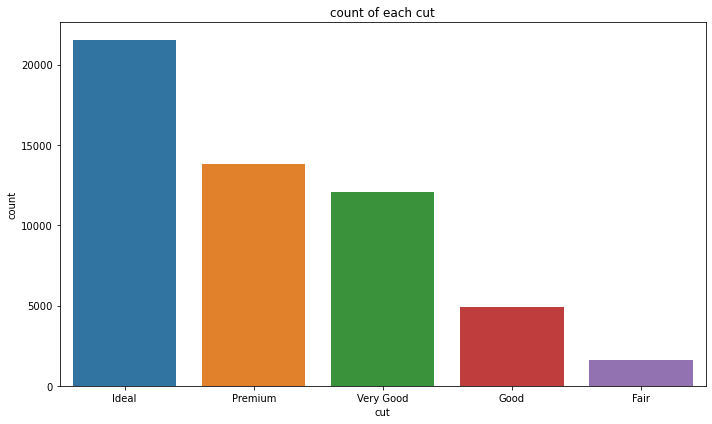

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
#create count bar plot
sns.countplot(x='cut',data = diamond_data,order = diamond_data['cut'].value_counts().index)
plt.title('count of each cut')    
plt.tight_layout()
plt.show()

From the above plot. We can see that the rank of cut frequency is Ideal > Premium > Very good > Good > Fair

### 7. boxplots of the diamond price for each cut

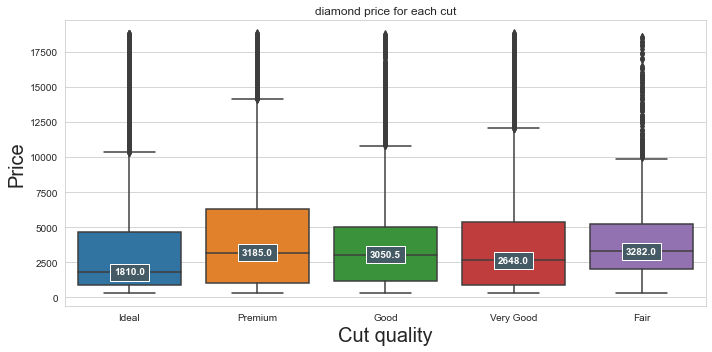

In [11]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
#create box plot
b = sns.boxplot(x='cut', y='price', data=diamond_data)
b.set_xlabel("Cut quality",fontsize=20)
b.set_ylabel("Price",fontsize=20)
plt.title('diamond price for each cut')

ax = b.axes
lines = ax.get_lines()
categories = ax.get_xticks()

#add median value label for each boxplot
for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25;  1 -> p75;  2 -> lower whisker;  3 -> upper whisker;  4 -> p50;  5 -> upper extreme value;
    y = round(lines[4+cat*6].get_ydata()[0],1) 
    ax.text(cat, y, f'{y}', ha='center', va='center', fontweight='bold', size=10, color='white', bbox=dict(facecolor='#445A64'))

b.figure.tight_layout()
plt.show()

- From the above boxplot result. We can see the mean of diamond price for each quality is close. 
- The Ideal one has the lowest median values and the Fair has the highest value. 
- They all have multiple outliers of price but these outliers are valuable.

### 8. histograms of the length, width, depth, and total depth attributes

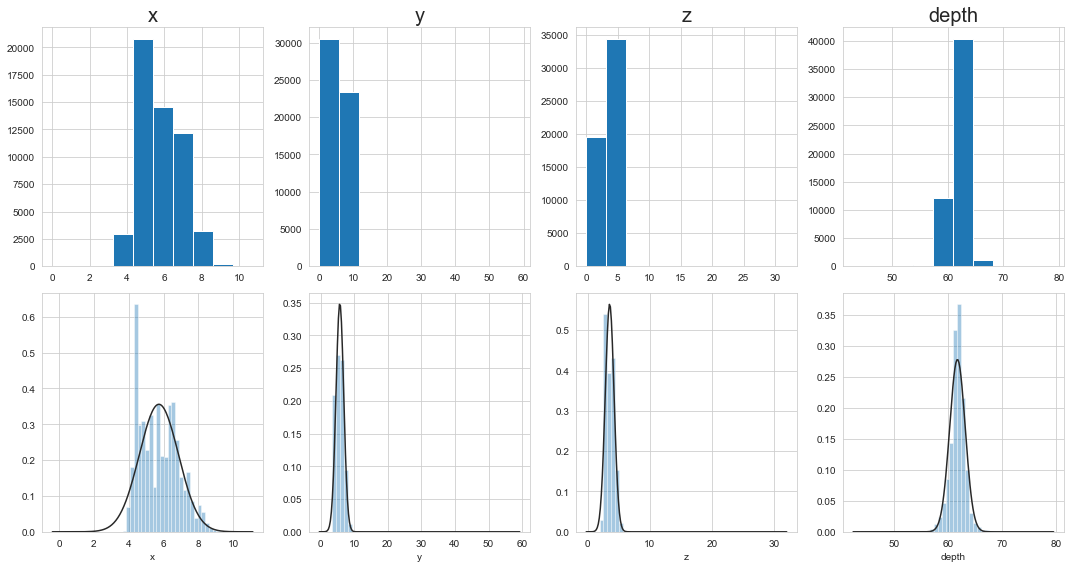

In [12]:
import matplotlib.mlab as mlab 
from scipy.stats import norm

numerical = ['x', 'y','z','depth']
fig = plt.figure(figsize=(15, 8))
i = 1
for f in numerical:    
    plt.subplot(2, 4, i) 
    #create hist plot
    plt.hist(diamond_data[f]) 
    plt.title(f,fontsize=20)  
    plt.subplot(2, 4, i+4) 
    # create a plot with a normal distribution fit   
    sns.distplot(diamond_data[f],fit=norm,kde=False)
    i += 1
plt.tight_layout()
plt.show()

From the hist and dist plot, we can see:
- x: length are mainly distributed from 4 to 9
- y: width are mainly distributed from 5 to 10
- z: depth are mainly distributed from 2 to 5
- depth: total depth are mainly distributed from 58 to 68

### 9. scatter plot of price vs. carat

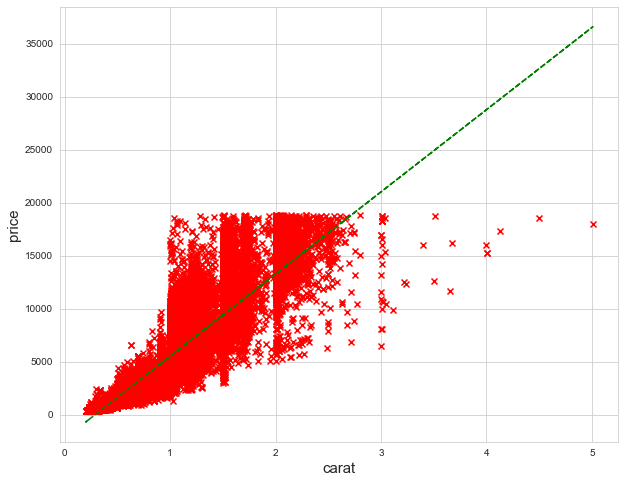

In [14]:
fig = plt.figure(figsize=(10, 8))
x = diamond_data.carat
y = diamond_data.price
plt.xlabel('carat',fontsize=15)
plt.ylabel('price',fontsize=15)
# create scatter plot
plt.scatter(x, y, c = 'r',marker = 'x')

# Add trend line
parameter = np.polyfit(x, y, 1)# 1 means linear function
p = np.poly1d(parameter)
plt.plot(x, p(x),"g--")

plt.show()

From the above scatter plot, we can see the relationship between carat and price. The more carats, the higher the price.